In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import os

def let_me_see(history):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    os.makedirs("models", exist_ok=True) # create a new folder "models" to save your model

In [3]:
# Load the MNIST dataset and split it into training and testing sets
if __name__ == "__main__":
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    # x_train: (N, h, w) = (60000, 28, 28)
    # y_train: (N,) = (60000,)
    # x_test: (N, h, w) = (10000, 28, 28)
    # y_test: (N,) = (10000,)

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
def process_x(x):

    x_normalized =  (x - np.min(x))/(np.max(x) - np.min(x)) # <Add your code here>
    return x_normalized

def process_y(y):

    y_onehot = keras.utils.to_categorical(y, num_classes=None, dtype="float32") # <Add your code here>
    return y_onehot

In [5]:
if __name__ == "__main__":
    # Perform data normalization
    x_train = process_x(x_train)
    x_test = process_x(x_test)
    # x_train: (N, h, w) = (60000, 28, 28)
    # x_test: (N, h, w) = (10000, 28, 28)

    # Convert the labels to one-hot encoded vectors
    y_train = process_y(y_train)
    y_test = process_y(y_test)
    # y_train: (N, 10) = (60000, 10)
    # y_test: (N, 10) = (10000, 10)

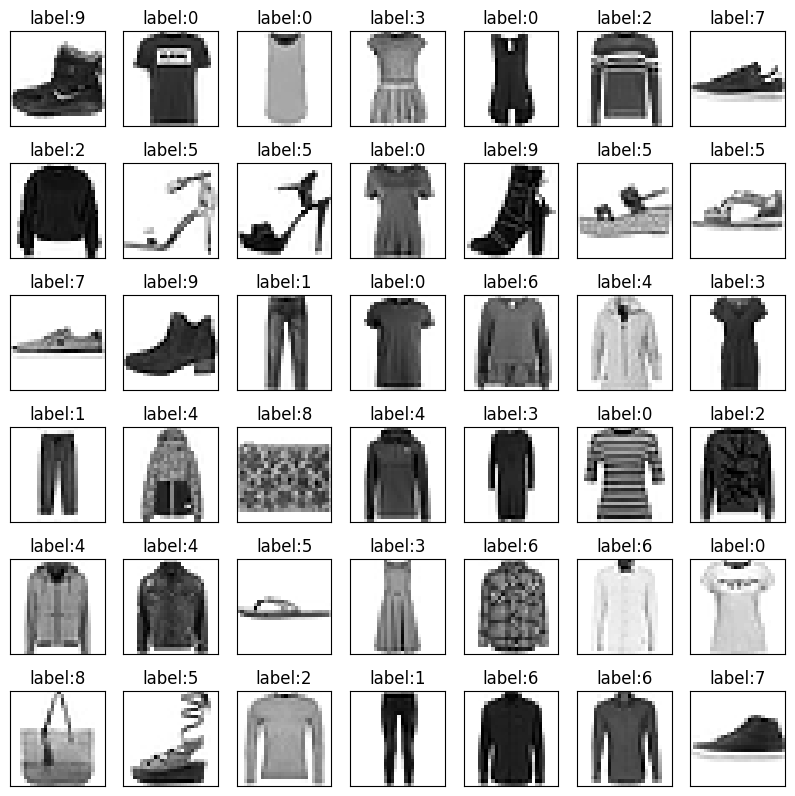

In [6]:
# visualize the picture in x_train
if __name__ == "__main__":
    plt.figure(figsize=(10, 10))
    for i in range(42):
        plt.subplot(6, 7, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.title(f"label:{np.argwhere(y_train[i] == 1)[0][0]}")


In [7]:
def BaselineModel(img_shape):
    # Create a sequential model
    model = Sequential()

    # Flatten the input image
    model.add(Flatten(input_shape=img_shape))

    # Add the output layer with 10 units (one for each class) and softmax activation
    model.add(Dense(10, activation='softmax'))

    return model

In [8]:
def myModel(img_shape):
    # Create a sequential model
    model = Sequential()

    # Flatten the input image
    model.add(Flatten(input_shape=img_shape))


    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.2))


    model.add(Dense(units=128, activation='tanh'))
    model.add(Dropout(0.2))


    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))


    model.add(Dense(units=10, activation='softmax'))
    return model

In [9]:
BaselineModel(img_shape=(28, 28)).summary()
myModel(img_shape=(28, 28)).summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               200960    
                                                                 


In [10]:
if __name__ == "__main__":
    # Create the model
    baseline = BaselineModel(img_shape=(28, 28))

    # Compile the model
    baseline.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    baseline_history = baseline.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 6s 6ms/step - loss: 0.6903 - accuracy: 0.7706 - val_loss: 0.5277 - val_accuracy: 0.8238
Epoch 2/10
750/750 [==============================] - 5s 6ms/step - loss: 0.4971 - accuracy: 0.8336 - val_loss: 0.4834 - val_accuracy: 0.8386
Epoch 3/10
750/750 [==============================] - 6s 7ms/step - loss: 0.4616 - accuracy: 0.8436 - val_loss: 0.4586 - val_accuracy: 0.8430
Epoch 4/10
750/750 [==============================] - 3s 3ms/step - loss: 0.4412 - accuracy: 0.8500 - val_loss: 0.4431 - val_accuracy: 0.8485
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.4290 - accuracy: 0.8538 - val_loss: 0.4387 - val_accuracy: 0.8498
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4199 - accuracy: 0.8574 - val_loss: 0.4350 - val_accuracy: 0.8496
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4121 - accuracy: 0.8587 - val_loss: 0.4310 - val_accuracy: 0.8528
Epoch 

In [11]:
if __name__ == "__main__":
    # Evaluate the model on the test data
    test_loss, test_accuracy = baseline.evaluate(x_test, y_test, verbose=1)
    print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.4526 - accuracy: 0.8430
Test accuracy: 0.8429999947547913


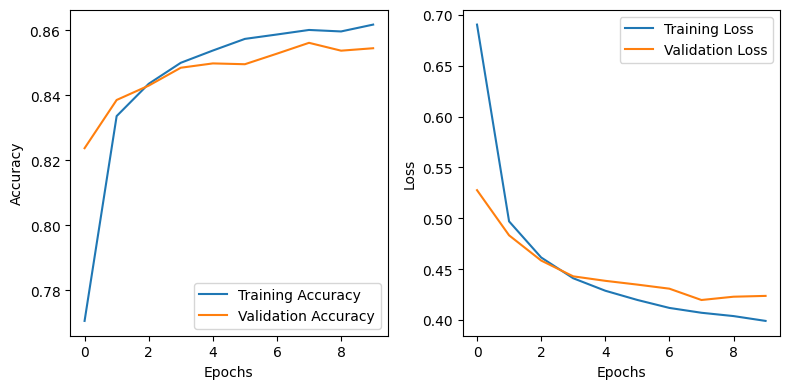

In [12]:
if __name__ == "__main__":
    let_me_see(baseline_history)

In [13]:
if __name__ == "__main__":
    # Create the model
    model = myModel(img_shape=(28, 28))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Create a callback that saves the model's weights
    checkpointer = keras.callbacks.ModelCheckpoint(
        filepath=os.path.join("models", "weights.hdf5"),
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True)

    # Train the model
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[checkpointer])

Epoch 1/10
747/750 [============================>.] - ETA: 0s - loss: 0.5749 - accuracy: 0.7916
Epoch 1: val_accuracy improved from -inf to 0.83208, saving model to models/weights.hdf5
750/750 [==============================] - 8s 10ms/step - loss: 0.5743 - accuracy: 0.7919 - val_loss: 0.4418 - val_accuracy: 0.8321
Epoch 2/10
 15/750 [..............................] - ETA: 5s - loss: 0.4512 - accuracy: 0.8323

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


744/750 [============================>.] - ETA: 0s - loss: 0.4191 - accuracy: 0.8478
Epoch 2: val_accuracy improved from 0.83208 to 0.86842, saving model to models/weights.hdf5
750/750 [==============================] - 6s 8ms/step - loss: 0.4188 - accuracy: 0.8480 - val_loss: 0.3690 - val_accuracy: 0.8684
Epoch 3/10
747/750 [============================>.] - ETA: 0s - loss: 0.3825 - accuracy: 0.8603
Epoch 3: val_accuracy did not improve from 0.86842
750/750 [==============================] - 7s 9ms/step - loss: 0.3825 - accuracy: 0.8604 - val_loss: 0.3629 - val_accuracy: 0.8653
Epoch 4/10
749/750 [============================>.] - ETA: 0s - loss: 0.3602 - accuracy: 0.8681
Epoch 4: val_accuracy improved from 0.86842 to 0.87583, saving model to models/weights.hdf5
750/750 [==============================] - 6s 8ms/step - loss: 0.3599 - accuracy: 0.8682 - val_loss: 0.3406 - val_accuracy: 0.8758
Epoch 5/10
749/750 [============================>.] - ETA: 0s - loss: 0.3455 - accuracy: 0.8736

In [14]:
if __name__ == "__main__":
    # load the best model
    model = keras.models.load_model(os.path.join('models', 'weights.hdf5'))
    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 2s 4ms/step - loss: 0.3415 - accuracy: 0.8720
Test accuracy: 0.871999979019165


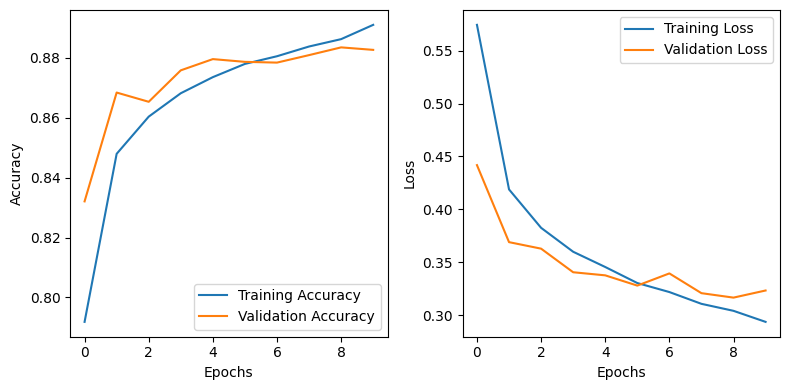

In [15]:
if __name__ == "__main__":
    let_me_see(history)